In [32]:
import json
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import ttest_ind

with open('seasonal_clubs_with_performances.csv', 'r') as f:
    all_clubs = pd.read_csv(f)

with open('transfermarkt_squad_attack.csv', 'r') as f:
    players = pd.read_csv(f)

with open('transfermarkt_squad_defender.csv', 'r') as f:
    defenders = pd.read_csv(f)
    
with open('transfermarkt_outfield_stats.csv', 'r') as f:
    players_2021 = pd.read_csv(f)
players_2021['appearances'] = players_2021['games_played'] / players_2021['total_games']

players_2021

,player_id,total_games,games_played,goals,assists,ppg,yellow_cards,second_yellow_cards,red_cards,appearances
0,258004,31,29.0,2.0,4.0,2.48,3.0,5.0,NaN,0.935484
1,176553,35,33.0,4.0,NaN,2.52,5.0,5.0,NaN,0.942857
2,186590,27,14.0,1.0,NaN,2.50,1.0,NaN,NaN,0.518519
3,177476,36,14.0,2.0,NaN,2.64,2.0,NaN,NaN,0.388889
4,340460,7,4.0,NaN,NaN,1.25,2.0,NaN,NaN,0.571429
...,...,...,...,...,...,...,...,...,...,...
3502,166683,36,25.0,NaN,NaN,NaN,5.0,3.0,NaN,0.694444
3503,98596,38,24.0,5.0,3.0,NaN,8.0,4.0,1.0,0.631579
3504,628472,3,3.0,NaN,NaN,NaN,NaN,2.0,NaN,1.000000
3505,550492,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#conver all - to 0
players_2021 = players_2021.fillna(0)

# players_2021 = players_2021.astype({'total_games': 'float64', 'ppg': 'float64', 
#                                           'yellow_cards': 'float64', 'second_yellow_cards': 'float64',
#                                           'red_cards': 'float64', 'goals': 'float64', 'assists': 'float64'})
clubs_2021 = all_clubs.loc[all_clubs['season_id'] == 2021]
df1 = players_2021.copy()
columns_to_scale = ['appearances','total_games', 'ppg',
       'yellow_cards', 'second_yellow_cards', 'red_cards', 'goals',
       'assists']

scaler = MinMaxScaler(feature_range=(0, 100))
df1[columns_to_scale] = scaler.fit_transform(df1[columns_to_scale])
df1

,player_id,total_games,games_played,goals,assists,ppg,yellow_cards,second_yellow_cards,red_cards,appearances
0,258004,55.555556,29.0,5.714286,19.047619,82.666667,10.000000,31.25,0.0,93.548387
1,176553,62.962963,33.0,11.428571,0.000000,84.000000,16.666667,31.25,0.0,94.285714
2,186590,48.148148,14.0,2.857143,0.000000,83.333333,3.333333,0.00,0.0,51.851852
3,177476,64.814815,14.0,5.714286,0.000000,88.000000,6.666667,0.00,0.0,38.888889
4,340460,11.111111,4.0,0.000000,0.000000,41.666667,6.666667,0.00,0.0,57.142857
...,...,...,...,...,...,...,...,...,...,...
3502,166683,64.814815,25.0,0.000000,0.000000,0.000000,16.666667,18.75,0.0,69.444444
3503,98596,68.518519,24.0,14.285714,14.285714,0.000000,26.666667,25.00,50.0,63.157895
3504,628472,3.703704,3.0,0.000000,0.000000,0.000000,0.000000,12.50,0.0,100.000000
3505,550492,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000


Text(0.5, 1.0, 'correlation heatmap')

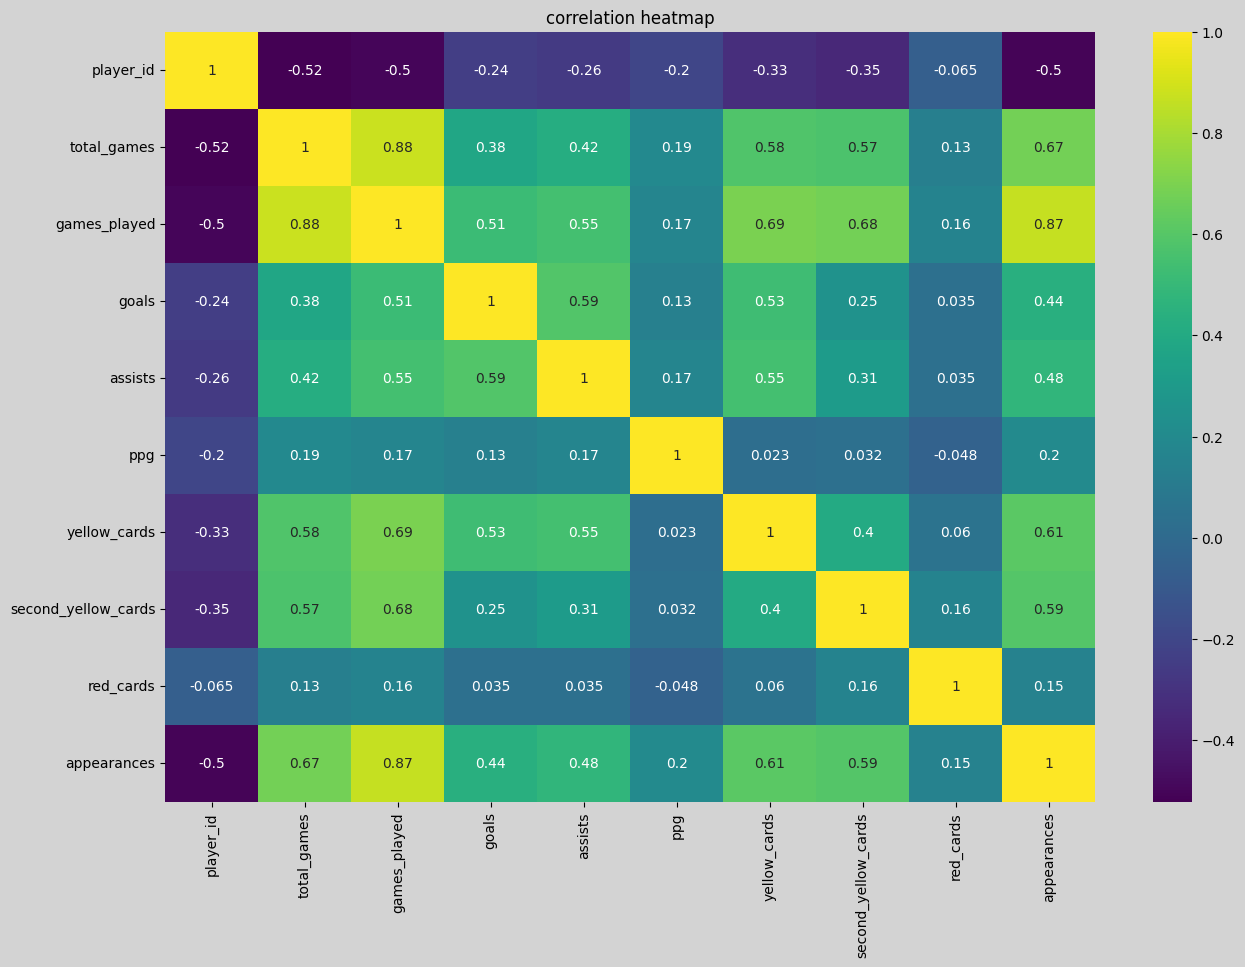

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
df2 = df1.copy()
df2 = df1.loc[df1['player_id'].isin(players['player_id'])]

corr_matrix = df2.corr()


fig1, ax1 = plt.subplots(figsize=(15, 10))
fig1.set_facecolor('lightgray')
sns.heatmap(corr_matrix, cmap='viridis', annot=True,ax=ax1)
ax1.set_title('correlation heatmap')


In [38]:
df_hamle = df1.copy()
df_hamle["score"] = df_hamle["appearances"] * 0.3 + df_hamle["goals"] * 0.3 + df_hamle["assists"] * 0.15 + df_hamle["ppg"] * 0.1 + df_hamle["yellow_cards"] * -0.05 + df_hamle["second_yellow_cards"] * -0.05 + df_hamle["red_cards"] * -0.05
df_hamle = df_hamle.merge(players[['player_id', 'club_id']], on='player_id', how='left')
df_hamle = df_hamle.sort_values("score" , ascending=False)
df_hamle

,player_id,total_games,games_played,goals,assists,ppg,yellow_cards,second_yellow_cards,red_cards,appearances,score,club_id
2249,38253,61.111111,34.0,100.0,19.047619,75.333333,20.0,12.50,0.0,100.0,68.765476,27
2246,38253,61.111111,34.0,100.0,19.047619,75.333333,20.0,12.50,0.0,100.0,68.765476,27
2252,38253,61.111111,34.0,100.0,19.047619,75.333333,20.0,12.50,0.0,100.0,68.765476,27
2251,38253,61.111111,34.0,100.0,19.047619,75.333333,20.0,12.50,0.0,100.0,68.765476,27
2250,38253,61.111111,34.0,100.0,19.047619,75.333333,20.0,12.50,0.0,100.0,68.765476,27
...,...,...,...,...,...,...,...,...,...,...,...,...
289,633659,7.407407,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,148
288,581598,33.333333,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,148
285,392772,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,148
1813,581677,24.074074,0.0,0.0,0.000000,0.000000,0.0,6.25,0.0,0.0,-0.312500,399


In [37]:
df_defa = df1.loc[df1['player_id'].isin(defenders['player_id'])]
df_defa["score"] = df_defa["appearances"] * 0.5 + df_defa["ppg"] * 0.4 + df_defa["yellow_cards"] * -0.3 + df_defa["second_yellow_cards"] * -0.5 + df_defa["red_cards"] * -0.5

# for each player get club id from defenders
df_defa = df_defa.merge(defenders[['player_id', 'club_id']], on='player_id', how='left')
df_defa = df_defa.sort_values("score" , ascending=False)
df_defa

,player_id,total_games,games_played,goals,assists,ppg,yellow_cards,second_yellow_cards,red_cards,appearances,score,club_id
3109,572919,0.000000,1.0,0.000000,0.000000,100.0,3.333333,0.00,0.0,100.000000,89.000000,79
2635,604323,14.814815,7.0,2.857143,0.000000,100.0,3.333333,0.00,0.0,77.777778,77.888889,27
891,776798,5.555556,3.0,0.000000,0.000000,100.0,3.333333,0.00,0.0,75.000000,76.500000,1237
341,341049,50.000000,28.0,11.428571,4.761905,87.0,0.000000,18.75,0.0,100.000000,75.425000,148
342,341049,50.000000,28.0,11.428571,4.761905,87.0,0.000000,18.75,0.0,100.000000,75.425000,148
...,...,...,...,...,...,...,...,...,...,...,...,...
7728,67089,62.962963,14.0,0.000000,0.000000,0.0,3.333333,43.75,50.0,40.000000,-27.875000,2687
7726,67089,62.962963,14.0,0.000000,0.000000,0.0,3.333333,43.75,50.0,40.000000,-27.875000,3709
7154,300168,66.666667,32.0,5.714286,0.000000,0.0,40.000000,18.75,100.0,86.486486,-28.131757,621
7606,378463,55.555556,19.0,2.857143,0.000000,0.0,3.333333,18.75,100.0,61.290323,-29.729839,237


In [48]:
clubs = pd.DataFrame()
#for every club id in df_defa get the sum of the scores
clubs['defence_score'] = df_defa.groupby('club_id')['score'].sum()
clubs['attack_score'] = df_hamle.groupby('club_id')['score'].sum()
clubs['diffrence'] = clubs['defence_score'] - clubs['attack_score']

#get the most defensive and least offensive clubs
clubs = clubs.sort_values("diffrence" , ascending=False)

#get the least offensive clubs 
clubs

,defence_score,attack_score,diffrence
club_id,,,
631,7540.814812,3969.501002,3571.313810
379,5388.982998,2542.126826,2846.856172
11,6214.572443,3576.313723,2638.258720
31,4859.342090,2563.975485,2295.366605
148,5133.611174,3172.268864,1961.342309
...,...,...,...
398,801.207659,1638.974228,-837.766569
430,959.930701,2153.240589,-1193.309888
162,1102.690187,2445.055786,-1342.365600
